# Proyecto Agencia de Renta de Autos

#### Materia Bases de Datos Avanzadas

##### Profesor Alex Botello

### Por: 

- Huerta Ramírez Michael Adolfo.
- Guerrero Paisano Jesedh.
- Roman Pardo Alejandro.
- Ramírez Montiel Alejandro

------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## Descripcion 

En este trabajo vamos a enumerar los pasos a seguir para crear la base de Datos en MongoDB para asi poderla consultar a traves de este notebook escrito con el lenguaje Python

- Creamos un Archivo Generando Nombres de Empleados, Sucursales y Clientes a traves de iteraciones con Python y diccionarios obtenidos en la red
- Realizamos Web Scrapping , a venta de autos, las paginas de renta tienen mucha proteccion de scrapping 
- Exportamos a CSV los dataframes creados
- Importamos con la herramienta grafica de MongoDBCompass los csv y los agregamos a las tablas, más que nada las tablas catalogo
- Para las tablas que forman parte de la operacion en este documento iteraremos las diferentes operaciones con el fin de Generar datos lo más precisos posibles
- Vamos a contestar las preguntas generadas en las reglas de negocio apoyandonos de graficas a partir de la libreria matplotlib


#### 1.-Conexion a la Base de datos


In [95]:
# Creamos la base de datos
#import pymongo
#myclient = pymongo.MongoClient("mongodb://localhost:27017/")
#mydb = myclient["RentaVehiculos"]

In [96]:
import pymongo
import json
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client['RentaVehiculos']
db


Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'RentaVehiculos')

In [97]:
print(db.list_collection_names())


['Autos', 'Reservacion', 'Clientes', 'Sucursales', 'Empleados', 'TicketRenta']


![image.png](./ScreenShots/1.png)
Creacion BD

![image.png](./ScreenShots/2.png)
Creacion BD

![image.png](./ScreenShots/3.png)
Creacion BD

2.- imprimimos todos los clientes en la BD

In [98]:
from pprint import pprint
mycol = db["Clientes"]
y = mycol.count_documents({})
print("Numero de documentos :", y)
for x in mycol.find().limit(3):
    pprint(x)


Numero de documentos : 99
{'Apellido': 'Lillo Amo',
 'Direccion': 'CountryOlive',
 'Email': 'TSAT231020003588@outlook.com',
 'FechaNacimiento': '26/03/1997',
 'INE': '810515',
 'Idioma': 'Ingles/Español',
 'Nombre': 'Valentín',
 'RFC': 'VLIA26031997982',
 'Telefono': '55889597',
 '_id': ObjectId('629cc53dddb894567833c2b8')}
{'Apellido': 'Téllez',
 'Direccion': 'Street,VenezuelaHeather',
 'Email': 'YMAA050619819712@hotmail.com',
 'FechaNacimiento': '09/03/1976',
 'INE': '412346',
 'Idioma': 'Ingles',
 'Nombre': 'Regina',
 'RFC': 'RTÉL09031976739',
 'Telefono': '55951632',
 '_id': ObjectId('629cc53dddb894567833c2b9')}
{'Apellido': 'Rogelio Cuenca Roca',
 'Direccion': 'Lane,VenezuelaCedar',
 'Email': 'ADER260419991673@outlook.com',
 'FechaNacimiento': '19/12/1987',
 'INE': '409106',
 'Idioma': 'Español',
 'Nombre': 'Emigdio',
 'RFC': 'EROC19121987946',
 'Telefono': '55521701',
 '_id': ObjectId('629cc53dddb894567833c2ba')}


3.- Checamos 3 vehiculos existentes


In [99]:
from pprint import pprint
mycolVehiculos = db["Autos"]
y = mycolVehiculos.count_documents({})
print("Numero de documentos :", y)
for x in mycolVehiculos.find().limit(3):
    pprint(x)


Numero de documentos : 30
{'Auto': ' Chevrolet Spark',
 'Color': 'Blanco',
 'Combustible': 'Gasolina',
 'Kilometraje': 30500,
 'Modelo': '2017',
 'Placa': '229-PKL',
 'Renta': 288,
 '_id': ObjectId('629cd257ddb894567833c352')}
{'Auto': ' Chevrolet Spark',
 'Color': 'Rojo',
 'Combustible': 'Gasolina',
 'Kilometraje': 28464,
 'Modelo': ' 2016',
 'Placa': '739-UH4',
 'Renta': 918,
 '_id': ObjectId('629cd257ddb894567833c353')}
{'Auto': ' Chevrolet Aveo',
 'Color': 'Gris',
 'Combustible': 'Diesel',
 'Kilometraje': 78158,
 'Modelo': ' 2016',
 'Placa': '443-GXS',
 'Renta': 520,
 '_id': ObjectId('629cd257ddb894567833c354')}


### Creamos la tabla Reservaciones

In [100]:
#NuevaColeccionReservaciones = db["Reservaciones"]

Cargaremos en tres listas los diferentes ID para crear de manera dinamica la tabla de reservaciones


In [101]:
idCliente = []
mycol = db["Clientes"]
for x in mycol.find():
    idCliente.append((x["_id"]))


In [102]:
idAutos = []
colAutos = db["Autos"]
for x in colAutos.find():
    idAutos.append((x["_id"]))


In [103]:
idEmpleados = []
colEmpleados = db["Empleados"]
for x in colEmpleados.find():
    idEmpleados.append((x["_id"]))


In [104]:
#pip install faker

In [105]:

import json
import random as rd
import datetime
from datetime import date
from bson import json_util
import csv
from pathlib import Path
import pandas as pd
from faker import Faker
fake = Faker()
from datetime import datetime


4.- Generamos aletoriamente las fechas de renta de vehiculos

In [106]:
def generarFechas():
    #start_date = datetime.date(year=2018, month=1, day=1)
    #end_date = datetime.date(year=2022, month=6, day=6)
    #inicio  = fake.date_between(start_date=, end_date=end_date)
    #fin  = fake.date_between(start_date=end_date, end_date='+2m')
    a  = fake.date_between_dates(date_start=datetime(2019,1,1), date_end=datetime(2019,3,20))
    b = fake.date_between_dates(date_start=datetime(2019,3,20), date_end=datetime(2020,5,10))
    return a,b   

In [107]:
generarFechas()

(datetime.date(2019, 3, 19), datetime.date(2020, 1, 13))

In [108]:
print(generarFechas()[0])
print(generarFechas()[1])

2019-02-26
2019-09-04


In [109]:
# Datos para ser escrito el diccionario que creara un dump de csv
idClientes = []
idVendedor = []
idVehiculo = []
StatusReserva = []
FechasSalida = []
FechasIngreso = []
rd.seed(3)
for x in range(40):
    idClientes.append(idCliente[rd.randint(0, len(idCliente)-1)])
    idVendedor.append(idEmpleados[rd.randint(0, len(idEmpleados)-1)])
    idVehiculo.append(idAutos[rd.randint(0, len(idAutos)-1)])
    StatusReserva.append(rd.randint(0, 3))
    FechasSalida.append(generarFechas()[0])
    FechasIngreso.append(generarFechas()[1])

Creamos una tabla con la libreria pandas para ordenar nuestra informacion y despues guardarla como CSV

In [110]:

Reservacion = pd.DataFrame(list(zip(idClientes, idVendedor, idVehiculo, StatusReserva, FechasSalida, FechasIngreso)),
                           columns=['idCliente', 'idEmpleado', 'idVehiculo', 'StatusReserva', 'FechaSalida', 'FechaIngreso'])
ReservacionDataFrame = Reservacion

5.- Guardamos como CSV

In [111]:
# Autos
filepath = Path('CSV/Reservacion.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
Reservacion.to_csv(filepath)

- 6.- Primera Consulta a Realizar
Buscaremos el id de este vehiculo en las rentas 629cd257ddb894567833c365, para ver cuantas veces aparece visualemnte

In [112]:

from bson.objectid import ObjectId
mycol2 = db["Reservacion"]
for x in mycol2.find({"idVehiculo": ObjectId("629cd257ddb894567833c365")}):
    pprint(x)

{'FechaIngreso': datetime.datetime(2022, 4, 20, 0, 0),
 'FechaSalida': datetime.datetime(2020, 3, 14, 0, 0),
 'StatusReserva': 2,
 '_id': ObjectId('629ceff1fdb2f724e1b127e2'),
 'idCliente': ObjectId('629cc53dddb894567833c316'),
 'idEmpleado': ObjectId('629cc8a5ddb894567833c328'),
 'idVehiculo': ObjectId('629cd257ddb894567833c365')}
{'FechaIngreso': datetime.datetime(2019, 3, 23, 0, 0),
 'FechaSalida': datetime.datetime(2019, 1, 22, 0, 0),
 'StatusReserva': 1,
 '_id': ObjectId('629ceff1fdb2f724e1b127e7'),
 'idCliente': ObjectId('629cc53dddb894567833c2f3'),
 'idEmpleado': ObjectId('629cc8a5ddb894567833c33b'),
 'idVehiculo': ObjectId('629cd257ddb894567833c365')}
{'FechaIngreso': datetime.datetime(2022, 1, 8, 0, 0),
 'FechaSalida': datetime.datetime(2021, 4, 15, 0, 0),
 'StatusReserva': 0,
 '_id': ObjectId('629ceff1fdb2f724e1b127f8'),
 'idCliente': ObjectId('629cc53dddb894567833c2bf'),
 'idEmpleado': ObjectId('629cc8a5ddb894567833c340'),
 'idVehiculo': ObjectId('629cd257ddb894567833c365')}

Accedemos a la tabla Reservacion y a la Autos y creamos su variables

In [113]:
VecesQueSeUsoXAuto = {}
Reservacion = db["Reservacion"]
Autos = db["Autos"]
identificadoresVehiculos = []
AutosNombre = []
Numero = []

Seleccionamos todos los autos en reservacion 

In [114]:
for x in Reservacion.find({}):
    identificadoresVehiculos.append((x["idVehiculo"]))

Concatenamos con el nombre de los autos

In [115]:
dataframeAutos = pd.DataFrame()
for x in identificadoresVehiculos:
    pipe2 = [{'$match': {'_id': ObjectId(x)}
            }]
    result = Autos.aggregate(pipe2)
    #print(list(result))
    dataframeAutos = dataframeAutos.append(list(result), ignore_index=True)

In [116]:
nombre_autos = dataframeAutos['Auto']
modelo = dataframeAutos['Modelo']

- 7.- Segunda Consulta
- Número de veces que se rentaron los vehiculos

In [117]:
import pymongo
import pandas as pd
from bson.son import SON
df = pd.DataFrame()
ListaContadora = []
result = ""
for x in identificadoresVehiculos:
    pipe2 = [{'$match': {'idVehiculo': ObjectId(x)}
            },
    {"$group" : {"_id":"$_id"}
    },
    {'$count': "Numero de veces que aparece este auto"}
]
    result = Reservacion.aggregate(pipe2)
    #pprint(list(result))
    df = df.append(list(result), ignore_index=True)

In [118]:
#df

Contar las veces que se rento

In [119]:
import pymongo
import pandas as pd
from bson.son import SON
dfDos = pd.DataFrame()
resultDos = Reservacion.aggregate([
    {
        '$group': {
            '_id': '$idVehiculo', 
            'count': {
                '$sum': 1
            }
        }
    }
])
#pprint(list(resultDos))
for x in (list(resultDos)):
    print(x)
    dfDos = dfDos.append([x], ignore_index=True)

{'_id': ObjectId('629cd257ddb894567833c36b'), 'count': 3}
{'_id': ObjectId('629cd257ddb894567833c36c'), 'count': 1}
{'_id': ObjectId('629cd257ddb894567833c36e'), 'count': 4}
{'_id': ObjectId('629cd257ddb894567833c35c'), 'count': 9}
{'_id': ObjectId('629cd257ddb894567833c358'), 'count': 5}
{'_id': ObjectId('629cd257ddb894567833c365'), 'count': 5}
{'_id': ObjectId('629cd257ddb894567833c361'), 'count': 4}
{'_id': ObjectId('629cd257ddb894567833c362'), 'count': 4}
{'_id': ObjectId('629cd257ddb894567833c359'), 'count': 2}
{'_id': ObjectId('629cd257ddb894567833c35d'), 'count': 2}
{'_id': ObjectId('629cd257ddb894567833c366'), 'count': 4}
{'_id': ObjectId('629cd257ddb894567833c35f'), 'count': 4}
{'_id': ObjectId('629cd257ddb894567833c364'), 'count': 3}
{'_id': ObjectId('629cd257ddb894567833c363'), 'count': 4}
{'_id': ObjectId('629cd257ddb894567833c360'), 'count': 1}
{'_id': ObjectId('629cd257ddb894567833c35e'), 'count': 4}
{'_id': ObjectId('629cd257ddb894567833c367'), 'count': 5}
{'_id': Object

Concatenamos nombre auto y modelo para poderlo graficar

In [120]:
dfDos = dfDos.join(nombre_autos)
dfDos = dfDos.join(modelo)

In [121]:
df = df.join(nombre_autos)
df = df.join(modelo)

In [122]:
dfDos["AB"] = dfDos["Auto"] + dfDos["Modelo"]

In [123]:
df["AB"] = df["Auto"] + df["Modelo"]
df

,Numero de veces que aparece este auto,Auto,Modelo,AB
0,9,Ford Fiesta,2012,Ford Fiesta2012
1,5,Fiat Uno,2019,Fiat Uno 2019
2,5,Nissan Versa,2017,Nissan Versa 2017
3,5,Chevrolet Spark,2017,Chevrolet Spark2017
4,5,Chevrolet Beat,2019,Chevrolet Beat 2019
...,...,...,...,...
95,3,Chevrolet Spark,2016,Chevrolet Spark 2016
96,5,Chevrolet Beat,2019,Chevrolet Beat 2019
97,4,Volkswagen Vento,2018,Volkswagen Vento 2018
98,2,Nissan Versa,2018,Nissan Versa 2018


In [124]:
#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = [20.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
#df.head(100).plot(x ='AB', y='Numero de veces que aparece este auto', kind = 'bar')
#plt.show()

Grafica de numero de Rentas

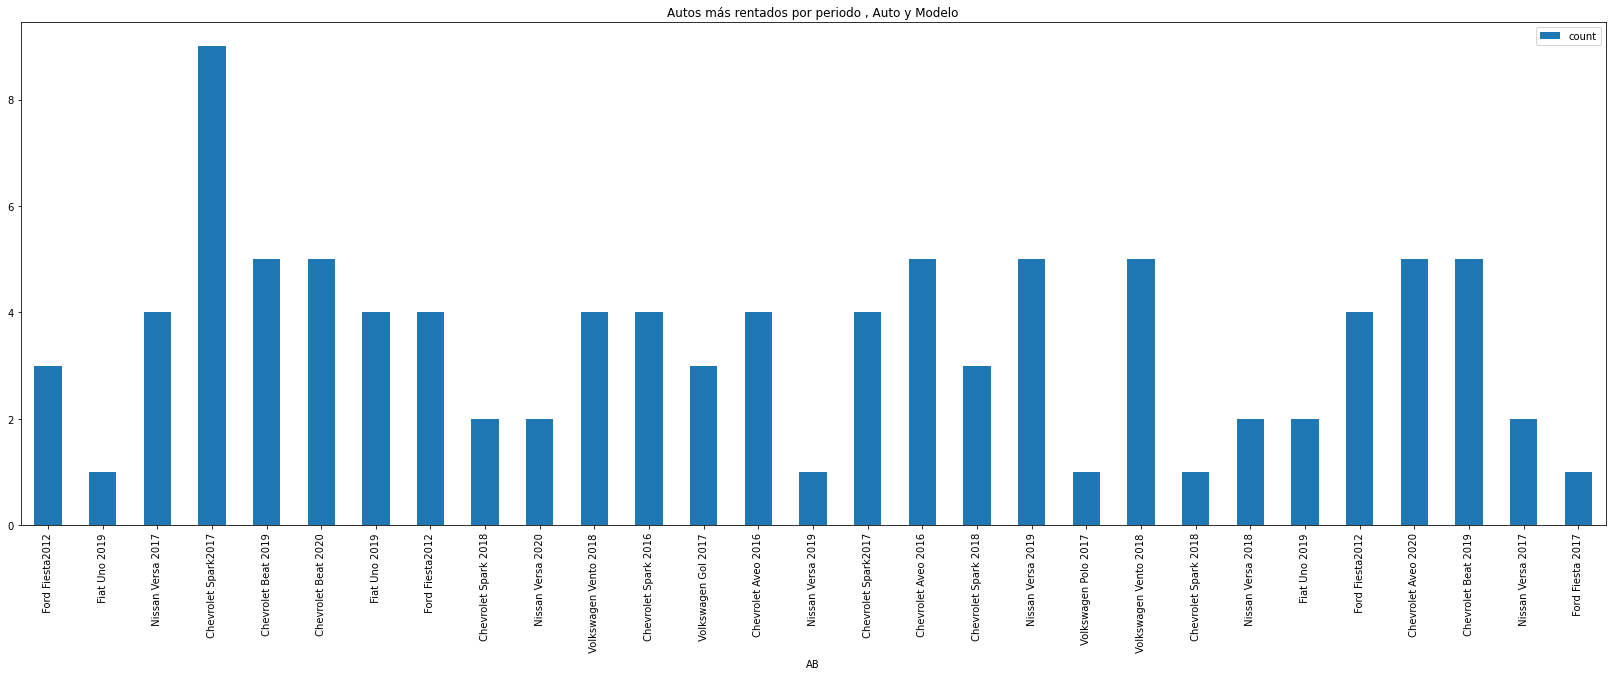

In [125]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [22.50, 9.50]
plt.rcParams["figure.autolayout"] = True
dfDos.head(100).plot(x ='AB', y='count', kind = 'bar')
plt.title("Autos más rentados por periodo , Auto y Modelo")
plt.show()

In [126]:
# declarar consultar 10 autos mas rentados
#df.sort_values(by=['Numero de veces que aparece este auto'], inplace=True,ascending=False)
#df

####  8.-Tercera Consulta
- Diez Más rentados

In [127]:
MasRentados = dfDos.sort_values(by=['count'] , ascending=False).head(10)
print("10 Más rentados:")
pprint(MasRentados)

10 Más rentados:
                         _id  count               Auto Modelo  \
3   629cd257ddb894567833c35c      9    Chevrolet Spark   2017   
25  629cd257ddb894567833c368      5     Chevrolet Aveo   2020   
18  629cd257ddb894567833c352      5       Nissan Versa   2019   
26  629cd257ddb894567833c36f      5     Chevrolet Beat   2019   
20  629cd257ddb894567833c354      5   Volkswagen Vento   2018   
16  629cd257ddb894567833c367      5     Chevrolet Aveo   2016   
5   629cd257ddb894567833c365      5     Chevrolet Beat   2020   
4   629cd257ddb894567833c358      5     Chevrolet Beat   2019   
6   629cd257ddb894567833c361      4           Fiat Uno   2019   
7   629cd257ddb894567833c362      4        Ford Fiesta   2012   

                        AB  
3      Chevrolet Spark2017  
25     Chevrolet Aveo 2020  
18       Nissan Versa 2019  
26     Chevrolet Beat 2019  
20   Volkswagen Vento 2018  
16     Chevrolet Aveo 2016  
5      Chevrolet Beat 2020  
4      Chevrolet Beat 2019  
6     

In [128]:
#plt.rcParams["figure.figsize"] = [10.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
#ten.plot(x ='AB', y='Numero de veces que aparece este auto', kind = 'bar')
#plt.show()

Generar Ticket de renta

In [129]:
dfTicket = pd.DataFrame()
listaTicket = []
coleccionTicket = db["Reservacion"]
for x in coleccionTicket.find(): 
    listaTicket.append(x)

In [130]:
dataframeTicket = dfTicket.append(listaTicket)

In [131]:
#dfTicket["Tiempo"] = dfTicket["FechaIngreso"] - dfTicket["FechaSalida"]
#dfTicket = dfTicket.join(modelo)
ReservacionDataFrame[['FechaSalida','FechaIngreso']] = ReservacionDataFrame[['FechaSalida','FechaIngreso']].apply(pd.to_datetime) #if conversion required
ReservacionDataFrame['Dias'] = (ReservacionDataFrame['FechaIngreso'] - ReservacionDataFrame['FechaSalida']).dt.days

Agregamos Autos a la tabla Reservaciones

In [132]:
baseUtos = db['Autos']
listaAutos =  pd.DataFrame()
listaNormalAutos = []
for x in ReservacionDataFrame['idVehiculo']:
    for y in baseUtos.find({"_id":ObjectId(x)}):
        listaNormalAutos.append(y)        
listaAutos = listaAutos.append(listaNormalAutos)
ReservacionDataFrame = ReservacionDataFrame.join(listaAutos["Renta"])
ReservacionDataFrame = ReservacionDataFrame.join(listaAutos["Auto"])

Agregamos Clientes a la Tabla Reservaciones

In [133]:
baseClientes = db['Clientes']
listaClientes =  pd.DataFrame()
listaNormalClientes = []
for x in ReservacionDataFrame['idCliente']:
    for y in baseClientes.find({"_id":ObjectId(x)}):
        listaNormalClientes.append(y)
listaClientes = listaClientes.append(listaNormalClientes)
listaClientes["FullName"] = listaClientes['Nombre']+ ' ' +listaClientes['Apellido']
ReservacionDataFrame = ReservacionDataFrame.join(listaClientes["FullName"])

- Cuarta Consulta

* Usuarios que más días rentaron Autos 

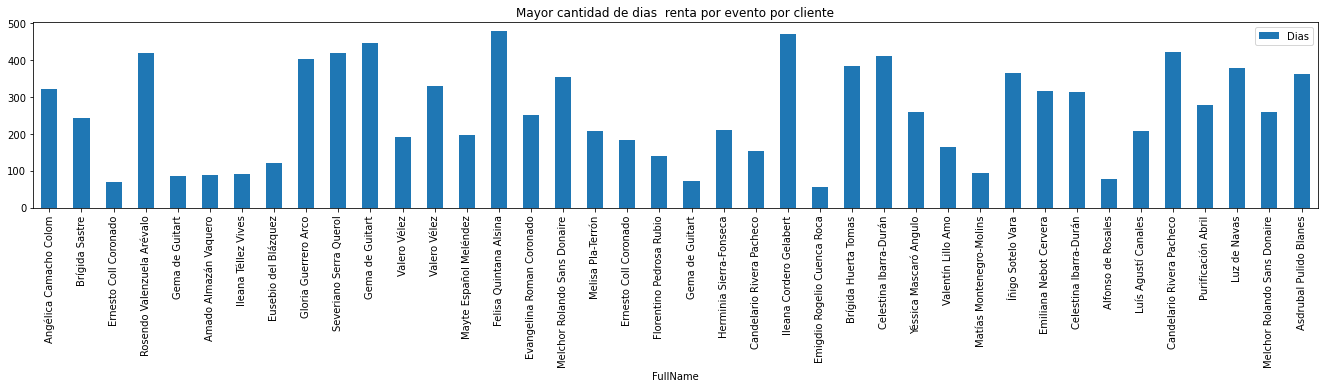

In [134]:
plt.rcParams["figure.figsize"] = [18.50, 5.50]
plt.rcParams["figure.autolayout"] = True
ReservacionDataFrame.plot(x ='FullName', y='Dias', kind = 'bar')
plt.title("Mayor cantidad de dias  renta por evento por cliente")
plt.show()

Organizar Por Fecha de Salida

In [135]:
ReservacionDataFrame["FechaSalida"] = pd.to_datetime(ReservacionDataFrame["FechaSalida"])
ReservacionDataFrame.sort_values(by="FechaSalida")

,idCliente,idEmpleado,idVehiculo,StatusReserva,FechaSalida,FechaIngreso,Dias,Renta,Auto,FullName
28,629cc53dddb894567833c2b8,629cc8a5ddb894567833c321,629cd257ddb894567833c355,0,2019-01-05,2019-06-18,164,286,Ford Figo,Valentín Lillo Amo
34,629cc53dddb894567833c307,629cc8a5ddb894567833c33d,629cd257ddb894567833c35a,3,2019-01-05,2019-08-01,208,420,Nissan March,Luís Agustí Canales
39,629cc53dddb894567833c306,629cc8a5ddb894567833c342,629cd257ddb894567833c366,1,2019-01-12,2020-01-08,361,765,Chevrolet Aveo,Asdrubal Pulido Blanes
14,629cc53dddb894567833c2ed,629cc8a5ddb894567833c33d,629cd257ddb894567833c36c,3,2019-01-12,2020-05-04,478,871,Nissan Sentra,Felisa Quintana Alsina
35,629cc53dddb894567833c309,629cc8a5ddb894567833c32c,629cd257ddb894567833c36f,2,2019-01-15,2020-03-13,423,871,Chevrolet Spark,Candelario Rivera Pacheco
16,629cc53dddb894567833c302,629cc8a5ddb894567833c32b,629cd257ddb894567833c36e,2,2019-01-16,2020-01-05,354,871,Ford Fiesta,Melchor Rolando Sans Donaire
36,629cc53dddb894567833c2ef,629cc8a5ddb894567833c32d,629cd257ddb894567833c362,2,2019-01-17,2019-10-22,278,677,Volkswagen Vento,Purificación Abril
31,629cc53dddb894567833c2e0,629cc8a5ddb894567833c334,629cd257ddb894567833c356,3,2019-01-17,2019-11-29,316,288,Chevrolet Aveo,Emiliana Nebot Cervera
27,629cc53dddb894567833c2f8,629cc8a5ddb894567833c32c,629cd257ddb894567833c353,2,2019-01-21,2019-10-06,258,918,Chevrolet Spark,Yéssica Mascaró Angulo
12,629cc53dddb894567833c2c9,629cc8a5ddb894567833c33c,629cd257ddb894567833c358,2,2019-01-22,2019-12-18,330,368,Chevrolet Beat,Valero Vélez


- Quinta consulta
-    Consultamos la duracion de la renta

In [136]:
dfSalida = pd.DataFrame()
coleccionReservacion = db["Reservacion"]
pipeFechaSalida = [
    {
        '$group': {
            '_id': '$FechaSalida', 
            'count': {
                '$sum': 1
            }
        }
    }
]
resultadoSalida = coleccionReservacion.aggregate(pipeFechaSalida)
    #pprint(list(resultadoSalida))
dfSalida = dfSalida.append(list(resultadoSalida), ignore_index=True)

Consulta de cuales autos estan disponibles haciendo join con la tabla reservaciones y Autos

In [137]:
from pprint import pprint
coleccionReservacion = db["Reservacion"]

pipeJoin =  [
  { '$match': { 'StatusReserva': 1 } }, #busca exactamente el 1
   {
      '$lookup':
       {
         'from': 'Autos', #Tabña foranea
         'localField': 'idVehiculo', #campo a unir
         'foreignField': '_id', #campo foraneo a unir
         'as': 'VehiculosCompleto' #nombre de la seccion 
       }
  }
] 

resultadoSalida = coleccionReservacion.aggregate(pipeJoin)
pprint(list(resultadoSalida))

[{'FechaIngreso': datetime.datetime(2021, 2, 12, 0, 0),
  'FechaSalida': datetime.datetime(2019, 1, 9, 0, 0),
  'StatusReserva': 1,
  'VehiculosCompleto': [{'Auto': ' Nissan Versa',
                         'Color': 'Negro',
                         'Combustible': 'Gasolina',
                         'Kilometraje': 58879,
                         'Modelo': ' 2017',
                         'Placa': '271-OFJ',
                         'Renta': 794,
                         '_id': ObjectId('629cd257ddb894567833c368')}],
  '_id': ObjectId('629ceff1fdb2f724e1b127e3'),
  'idCliente': ObjectId('629cc53dddb894567833c2d5'),
  'idEmpleado': ObjectId('629cc8a5ddb894567833c320'),
  'idVehiculo': ObjectId('629cd257ddb894567833c368')},
 {'FechaIngreso': datetime.datetime(2022, 1, 27, 0, 0),
  'FechaSalida': datetime.datetime(2022, 3, 28, 0, 0),
  'StatusReserva': 1,
  'VehiculosCompleto': [{'Auto': ' Chevrolet Beat',
                         'Color': 'Negro',
                         'Combustible':

Buscar autos rentados de entre valor dado que en este caso es 800

In [138]:
from pprint import pprint
coleccionReservacion = db["Reservacion"]

pipeJoin =  [
   
   {
      '$lookup':
       {
         'from': 'Autos', #Tabña foranea
         'localField': 'idVehiculo', #campo a unir
         'foreignField': '_id', #campo foraneo a unir
         'pipeline': [{
            '$project': {
            'Renta': { '$gt': [ '$Renta', 800 ] }
                        }
       }],
         'as': 'VehiculosCompleto' #nombre de la seccion 
       }
  }
] 

resultadoSalida = coleccionReservacion.aggregate(pipeJoin)
pprint(list(resultadoSalida))

[{'FechaIngreso': datetime.datetime(2019, 2, 17, 0, 0),
  'FechaSalida': datetime.datetime(2021, 4, 21, 0, 0),
  'StatusReserva': 3,
  'VehiculosCompleto': [{'Renta': False,
                         '_id': ObjectId('629cd257ddb894567833c35c')}],
  '_id': ObjectId('629ceff1fdb2f724e1b127e1'),
  'idCliente': ObjectId('629cc53dddb894567833c2f3'),
  'idEmpleado': ObjectId('629cc8a5ddb894567833c334'),
  'idVehiculo': ObjectId('629cd257ddb894567833c35c')},
 {'FechaIngreso': datetime.datetime(2022, 4, 20, 0, 0),
  'FechaSalida': datetime.datetime(2020, 3, 14, 0, 0),
  'StatusReserva': 2,
  'VehiculosCompleto': [{'Renta': False,
                         '_id': ObjectId('629cd257ddb894567833c365')}],
  '_id': ObjectId('629ceff1fdb2f724e1b127e2'),
  'idCliente': ObjectId('629cc53dddb894567833c316'),
  'idEmpleado': ObjectId('629cc8a5ddb894567833c328'),
  'idVehiculo': ObjectId('629cd257ddb894567833c365')},
 {'FechaIngreso': datetime.datetime(2021, 2, 12, 0, 0),
  'FechaSalida': datetime.datetime

Los que retornen true su renta es mayor a 800

In [139]:
#{"_id" :(ObjectId('629cd257ddb894567833c361'))}

In [140]:
dfSalida.sort_values(by="count")

,_id,count
0,2019-01-20,1
64,2019-04-05,1
63,2020-02-05,1
62,2019-01-09,1
61,2020-04-05,1
...,...,...
35,2020-03-10,2
36,2019-03-13,2
42,2020-01-28,2
5,2022-03-26,2


En esta grafica se aprecia cuales han sido los dias que ha generado más rentas totales

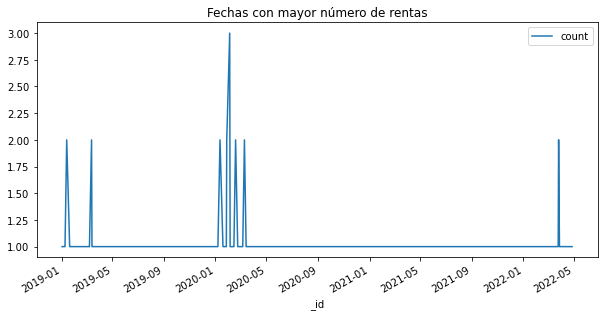

In [141]:
plt.rcParams["figure.figsize"] = [8.50, 4.50]
plt.rcParams["figure.autolayout"] = True
dfSalida.plot(x ='_id', y='count', kind = 'line')
plt.title("Fechas con mayor número de rentas")
plt.show()

Realizamos multilpicacion de dias por precio de renta

In [142]:
ReservacionDataFrame["CostoTotal"] = ReservacionDataFrame['Dias']*ReservacionDataFrame['Renta']

Agregamos Columna e imprimimos el cliente que ha gastado más dinero en renta individual de automovil

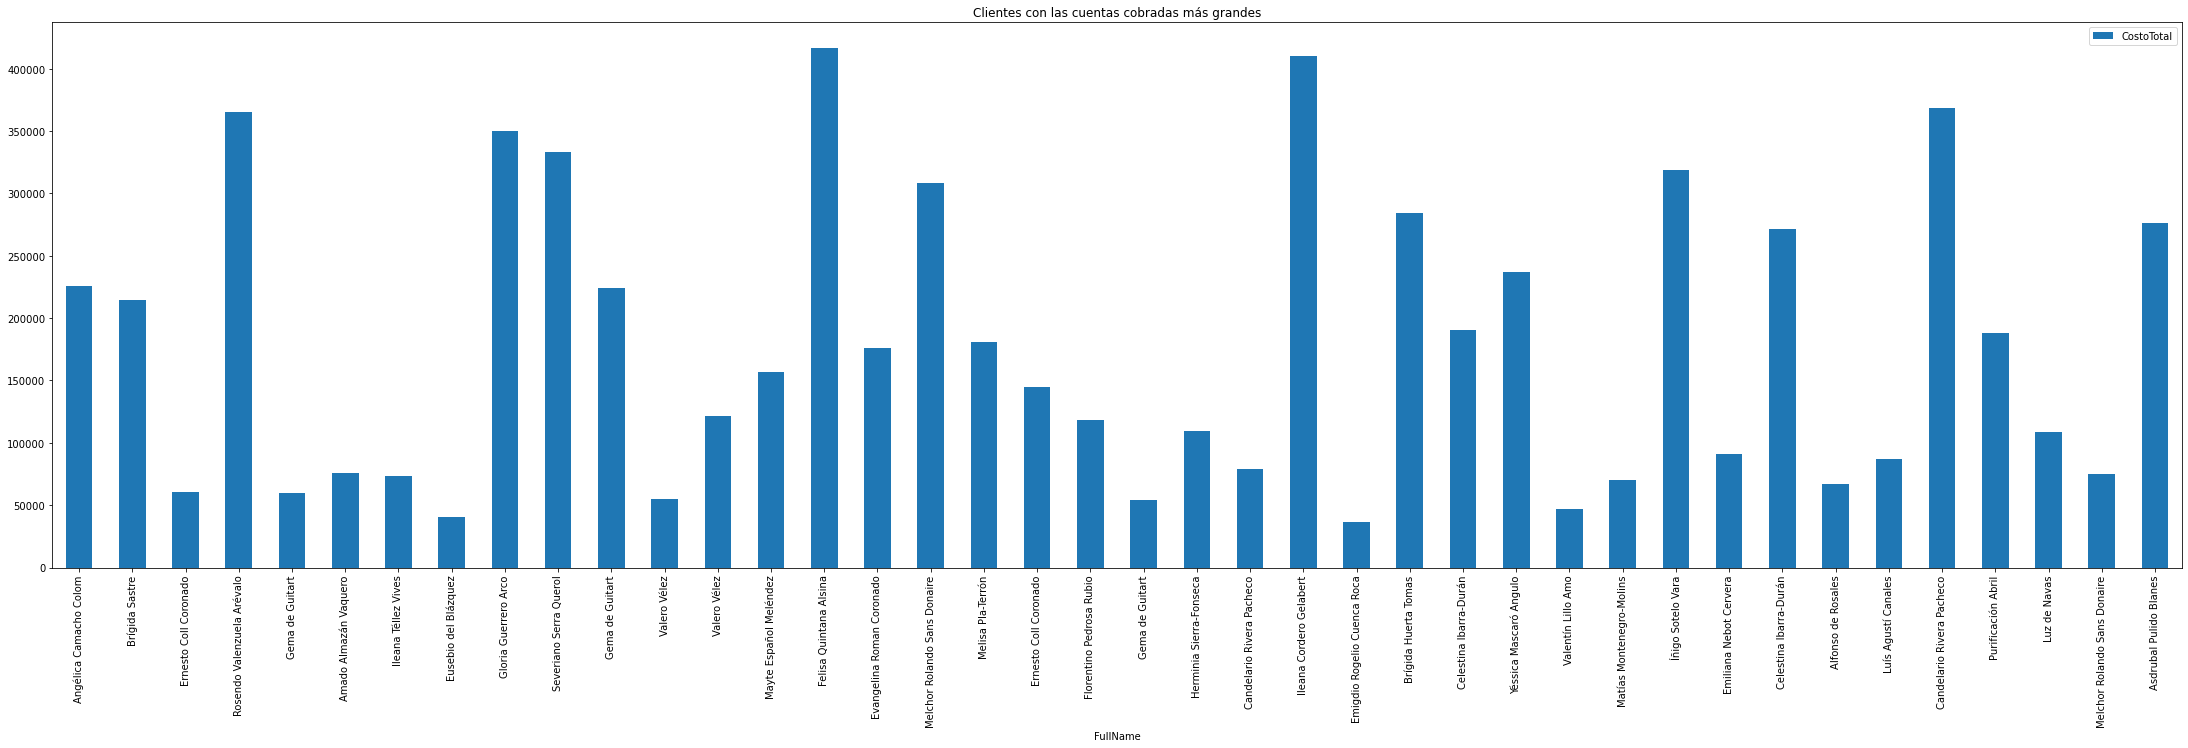

In [143]:
plt.rcParams["figure.figsize"] = [30.50, 10.50]
plt.rcParams["figure.autolayout"] = True
ReservacionDataFrame.plot(x ='FullName', y='CostoTotal', kind = 'bar')
plt.title("Clientes con las cuentas cobradas más grandes")
plt.show()

Sexta Consulta: Mejores Vendedores por numero de venta 

In [144]:
ReservacionxEmpleado = db["Reservacion"]
EmpleadoxReservacion = db["Empleados"]
#table temporal
ReservacionListaEmpleado = []
ReservacionListaReservacion = []
#Busqueda de Reservacion
BusquedaEmpleadoReservacion = EmpleadoxReservacion.find()
for x in BusquedaEmpleadoReservacion:
    ReservacionListaReservacion.append(x)
ReservacionEmpleadoDF =  pd.DataFrame()
ReservacionReservacionDF = pd.DataFrame()
for y in ReservacionListaReservacion:
    ReservacionEmpleadoDF =  ReservacionEmpleadoDF.append(y, ignore_index=True)   

In [145]:
dfTres = pd.DataFrame()
resultTres = Reservacion.aggregate([
    {
        '$group': {
            '_id': '$idEmpleado', 
            'count': {
                '$sum': 1
            }
        }
    }
])
#pprint(list(resultDos))
for x in (list(resultTres)):
    print(x)
    dfTres = dfTres.append([x], ignore_index=True)

{'_id': ObjectId('629cc8a5ddb894567833c341'), 'count': 3}
{'_id': ObjectId('629cc8a5ddb894567833c33c'), 'count': 3}
{'_id': ObjectId('629cc8a5ddb894567833c340'), 'count': 2}
{'_id': ObjectId('629cc8a5ddb894567833c33d'), 'count': 1}
{'_id': ObjectId('629cc8a5ddb894567833c328'), 'count': 2}
{'_id': ObjectId('629cc8a5ddb894567833c322'), 'count': 2}
{'_id': ObjectId('629cc8a5ddb894567833c326'), 'count': 1}
{'_id': ObjectId('629cc8a5ddb894567833c32a'), 'count': 5}
{'_id': ObjectId('629cc8a5ddb894567833c32b'), 'count': 3}
{'_id': ObjectId('629cc8a5ddb894567833c334'), 'count': 4}
{'_id': ObjectId('629cc8a5ddb894567833c31f'), 'count': 1}
{'_id': ObjectId('629cc8a5ddb894567833c323'), 'count': 2}
{'_id': ObjectId('629cc8a5ddb894567833c331'), 'count': 3}
{'_id': ObjectId('629cc8a5ddb894567833c32f'), 'count': 4}
{'_id': ObjectId('629cc8a5ddb894567833c32e'), 'count': 3}
{'_id': ObjectId('629cc8a5ddb894567833c336'), 'count': 3}
{'_id': ObjectId('629cc8a5ddb894567833c32c'), 'count': 3}
{'_id': Object

In [146]:
rfc = ReservacionEmpleadoDF['RFC']
rfc

0     MALR17031977706
1     AALE19081997375
2     SBIP01071984458
3     GBAR08091974169
4     ACAV05031991396
5     BNUE12061972933
6     MBAB05011998903
7     SCOT13091981102
8     EFOA26051975358
9     IARG04101985503
10    SPIE27071997271
11    DCAV25031974810
12    BSAE28071994218
13    JLUL10101984412
14    MDIS18081992341
15    CFAI23111980420
16    OTEX20091989366
17    IMEO06111983745
18    MVIN09111990306
19    MVID20101976921
20    SREF19111980298
21    DGOÇ18071981251
22    ADAM07021992380
23    MCOT02041983366
24    LAZV25031989946
25    DSIV15021977250
26    IFRI04011980334
27    AVIN11111989432
28    LDAM07051975565
29    GDAP21121988323
30    RPEE15101994129
31    JVIS15111972772
32    ASIV08061978908
33    LSOZ01071985517
34    EPEE04021982739
35    ECAV17061995333
36    PNOU24091971641
37    LLIA02051994526
38    ALAS23061983685
39    HCAD02101979677
Name: RFC, dtype: object

In [147]:
dfTres = dfTres.join(rfc)

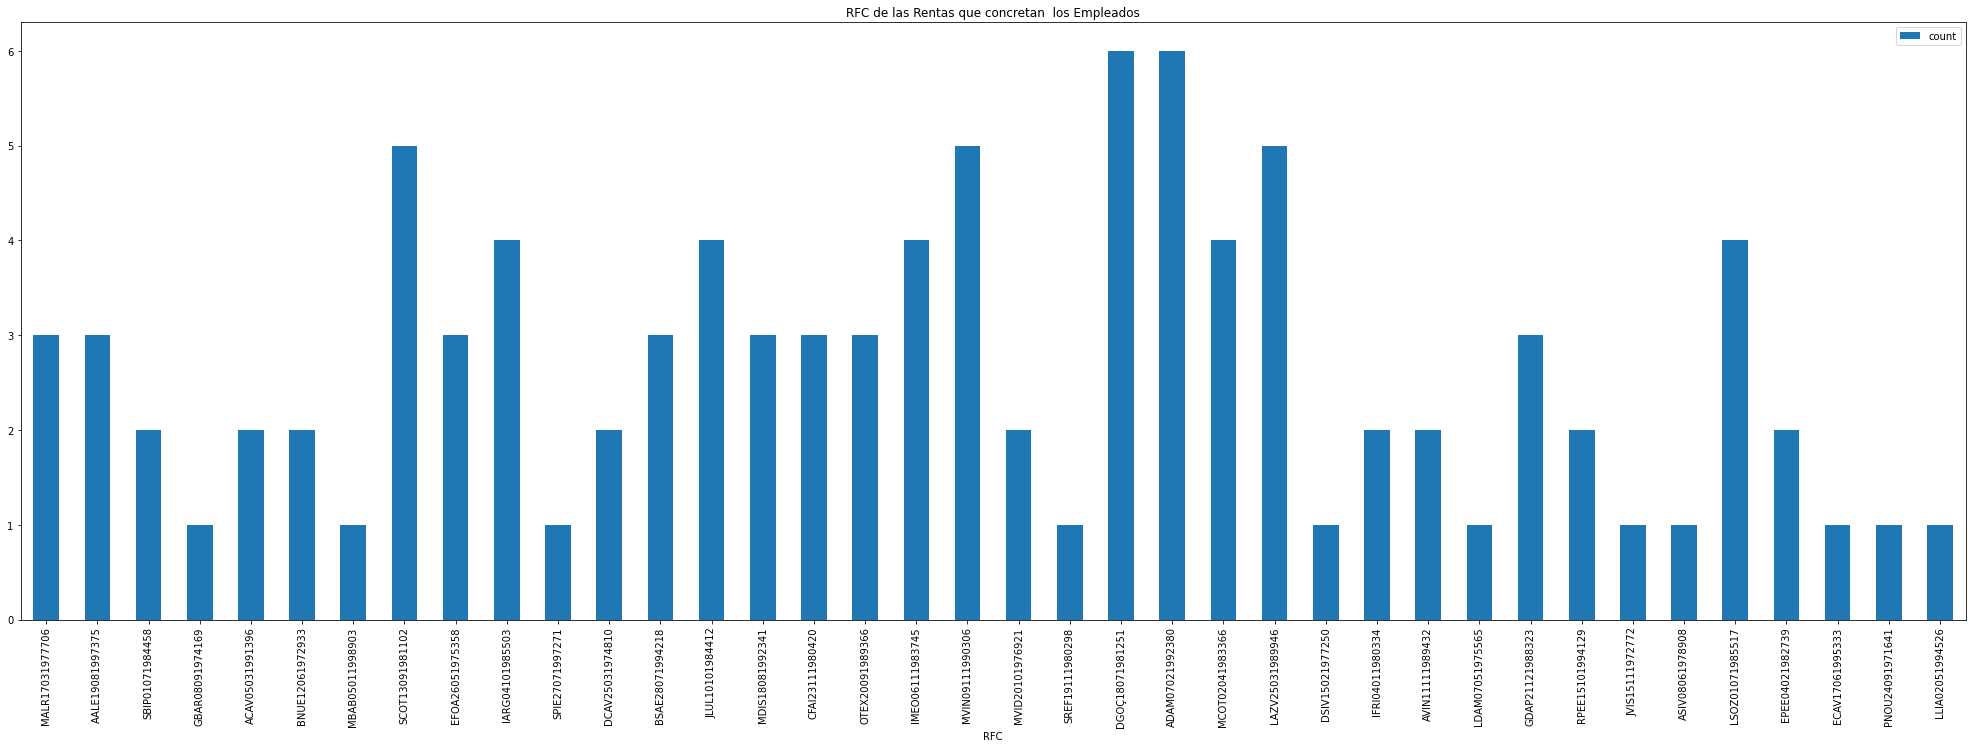

In [148]:
plt.rcParams["figure.figsize"] = [27.50, 10.50]
plt.rcParams["figure.autolayout"] = True
dfTres.plot(x ='RFC', y='count', kind = 'bar')
plt.title("RFC de las Rentas que concretan  los Empleados")
plt.show()

In [149]:
#PROMEDIO TICKEY
#TIEMPO PROMEDIO DE RENTA
#TICKET , CREAMOS UN TOTAL , USUARIO, VENDEDOR , SUCURSAL DE SALIDA Y EL AUTO Y KILOMETRAJE

In [150]:
TiempoPromedioRenta = ReservacionDataFrame["Dias"].mean()

In [151]:
print("El Tiempo promedio de renta es de " , TiempoPromedioRenta , " dias")

El Tiempo promedio de renta es de  257.15  dias


#### Creamos la tabla de ticket de renta 

In [152]:
#Agregar Sucursal
TicketdeRenta = pd.DataFrame(ReservacionDataFrame["Renta"] , ReservacionDataFrame["Auto"])

In [153]:
TicketdeRenta = ReservacionDataFrame[['CostoTotal', 'Auto', 'FullName','FechaSalida','StatusReserva']].copy()

In [154]:
TicketFinal = TicketdeRenta['StatusReserva'] == 3
TicketFinal.head()

0    False
1    False
2     True
3    False
4     True
Name: StatusReserva, dtype: bool

In [155]:
TicketFinal2 = TicketdeRenta[TicketFinal]

In [156]:
sucursales = db["Sucursales"]
listaSucursales =  pd.DataFrame()
listaNormalSucursales = []
for y in sucursales.find({}):
    listaNormalSucursales.append(y)

In [157]:
listaSucursales = listaSucursales.append(listaNormalSucursales)

In [158]:
listaIDSucursales = []
listaNombreSucursales = []

for m in range(len(TicketdeRenta)):
    y = rd.randint(0,4)
    listaIDSucursales.append(listaSucursales.iloc[y]._id)
    listaNombreSucursales.append(listaSucursales.iloc[y].SKU)

In [159]:

listaIDSucursalesPd = pd.DataFrame({"idSucursal": listaIDSucursales,"SKUSucursale":listaNombreSucursales})

In [160]:
TicketFinal2 = TicketFinal2.join(listaIDSucursalesPd)

In [161]:
TicketFinal2

,CostoTotal,Auto,FullName,FechaSalida,StatusReserva,idSucursal,SKUSucursale
2,60970,Chevrolet Spark,Ernesto Coll Coronado,2019-02-15,3,629cd229ddb894567833c34e,pm14ra
4,59840,Volkswagen Vento,Gema de Guitart,2019-03-06,3,629cd229ddb894567833c34d,pm7am
9,333480,Nissan Versa,Severiano Serra Querol,2019-02-23,3,629cd229ddb894567833c34f,pm36eg
10,223892,Chevrolet Aveo,Gema de Guitart,2019-02-06,3,629cd229ddb894567833c34b,pm42lp
14,416338,Nissan Sentra,Felisa Quintana Alsina,2019-01-12,3,629cd229ddb894567833c34e,pm14ra
15,176000,Volkswagen Vento,Evangelina Roman Coronado,2019-02-25,3,629cd229ddb894567833c34d,pm7am
21,109200,Chevrolet Aveo,Herminia Sierra-Fonseca,2019-02-27,3,629cd229ddb894567833c34c,pm25et
24,36366,Renault Kwid,Emigdio Rogelio Cuenca Roca,2019-03-01,3,629cd229ddb894567833c34f,pm36eg
31,91008,Chevrolet Aveo,Emiliana Nebot Cervera,2019-01-17,3,629cd229ddb894567833c34c,pm25et
32,271752,Renault Stepway,Celestina Ibarra-Durán,2019-03-19,3,629cd229ddb894567833c34d,pm7am


In [162]:
# Ticket de Renta
filepath = Path('CSV/TicketRenta.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
TicketFinal2.to_csv(filepath)

In [163]:
finalRenta = db["TicketRenta"]
y = finalRenta.count_documents({})
print("Numero de documentos :", y)
for x in finalRenta.find():
    pprint(x)

Numero de documentos : 12
{'Auto': ' Chevrolet Spark',
 'CostoTotal': 100165,
 'FechaSalida': datetime.datetime(2019, 3, 10, 0, 0),
 'FullName': 'Ernesto Coll Coronado',
 'SKUSucursale': 'pm25et',
 'StatusReserva': '3',
 '_id': ObjectId('62a4b91cfdb2f724e1b128c7'),
 'idSucursal': ObjectId('629cd229ddb894567833c34c')}
{'Auto': ' Volkswagen Vento',
 'CostoTotal': 206976,
 'FechaSalida': datetime.datetime(2019, 1, 19, 0, 0),
 'FullName': 'Gema de Guitart',
 'SKUSucursale': 'pm42lp',
 'StatusReserva': '3',
 '_id': ObjectId('62a4b91cfdb2f724e1b128c8'),
 'idSucursal': ObjectId('629cd229ddb894567833c34b')}
{'Auto': ' Nissan Versa',
 'CostoTotal': 27790,
 'FechaSalida': datetime.datetime(2019, 3, 12, 0, 0),
 'FullName': 'Severiano Serra Querol',
 'SKUSucursale': 'pm36eg',
 'StatusReserva': '3',
 '_id': ObjectId('62a4b91cfdb2f724e1b128c9'),
 'idSucursal': ObjectId('629cd229ddb894567833c34f')}
{'Auto': ' Chevrolet Aveo',
 'CostoTotal': 66264,
 'FechaSalida': datetime.datetime(2019, 3, 9, 0, 0),


Eliminar por ID

In [164]:
#finalRenta.delete_one( { "_id" : ObjectId("62a4b91cfdb2f724e1b128d3") } )

Insertar documento 

In [166]:
mydict = {'Auto': ' Nissan Sentra',
 'CostoTotal': 96681,
 'FechaSalida': datetime(2019, 1, 10, 0, 0),
 'FullName': 'Felisa Quintana Alsina',
 'SKUSucursale': 'pm7am',
 'StatusReserva': '3',
 'idSucursal': ObjectId('629cd229ddb894567833c34d')}

#x = finalRenta.insert_one(mydict)

Actualizar Documento

In [168]:
myquery = { "_id" : ObjectId("62a4b91cfdb2f724e1b128d0") }
newvalues = { "$set": { "CostoTotal": 99123 } }

finalRenta.update_one(myquery, newvalues)

#print "customers" after the update:
for x in finalRenta.find():
  print(x)

{'_id': ObjectId('62a4b91cfdb2f724e1b128c7'), 'CostoTotal': 100165, 'Auto': ' Chevrolet Spark', 'FullName': 'Ernesto Coll Coronado', 'FechaSalida': datetime.datetime(2019, 3, 10, 0, 0), 'StatusReserva': '3', 'idSucursal': ObjectId('629cd229ddb894567833c34c'), 'SKUSucursale': 'pm25et'}
{'_id': ObjectId('62a4b91cfdb2f724e1b128c8'), 'CostoTotal': 206976, 'Auto': ' Volkswagen Vento', 'FullName': 'Gema de Guitart', 'FechaSalida': datetime.datetime(2019, 1, 19, 0, 0), 'StatusReserva': '3', 'idSucursal': ObjectId('629cd229ddb894567833c34b'), 'SKUSucursale': 'pm42lp'}
{'_id': ObjectId('62a4b91cfdb2f724e1b128c9'), 'CostoTotal': 27790, 'Auto': ' Nissan Versa', 'FullName': 'Severiano Serra Querol', 'FechaSalida': datetime.datetime(2019, 3, 12, 0, 0), 'StatusReserva': '3', 'idSucursal': ObjectId('629cd229ddb894567833c34f'), 'SKUSucursale': 'pm36eg'}
{'_id': ObjectId('62a4b91cfdb2f724e1b128ca'), 'CostoTotal': 66264, 'Auto': ' Chevrolet Aveo', 'FullName': 'Gema de Guitart', 'FechaSalida': datetime.d

Conclusion : La utilizacion de MongoDB para realizar este proyecto de Base de Datos por la simpleza y la continua integracion para escalar horizontalmente en caso de requerir más implementacion futura de reglas de negocio salientes. 